# Transition Path

In this notebook, I solve and simulate the housing model along a **transition path** stemming from an interest rate shock

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy import optimize
from consav import linear_interp

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# Set the number of threads in numba
nb.set_num_threads(4)

**Solved the Initial Steady State**

In [2]:
model = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm', 'do_print':False})

In [3]:
model.precompile_numba()
model.solve()

**Solve and Simulate Along a Transition Path**

In [43]:
model.solve_path()

In [45]:
model.simulate_path()

Check the policy functions

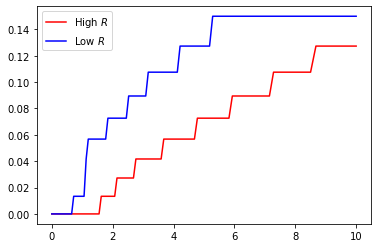

In [76]:
plt.plot(model.par.grid_m, model.sol_path.d_adj[199,0,1,:], color = 'red', linewidth = '1.5', label = r'High $R$')
plt.plot(model.par.grid_m, model.sol_path.d_adj[210,0,1,:], color = 'blue', linewidth = '1.5', label = r'Low $R$')

plt.legend()
plt.show()

(150.0, 400.0)

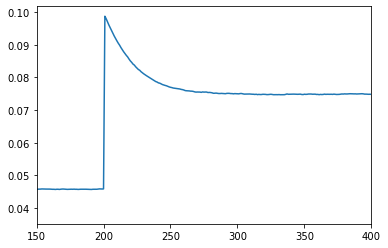

In [77]:
mom1_h = np.mean(model.sim_path.n, axis=1)
mom1_m = np.mean(model.sim_path.m, axis=1)
mom1_c = np.mean(model.sim_path.c, axis=1)
adj = np.mean(model.sim_path.discrete, axis=1)

plt.plot(mom1_h)
plt.xlim(150,400)